[ 0.63969525  0.07941585  0.01976508 -0.86589837 -0.81166365 -0.21676945
  0.36174341]
1.8977734592306714
0.4740232339239423
0.4835885444947774
[ 0.63613076  0.15847579  0.03447017 -0.11502971  0.07119682]
1.8977734592307616


<Axes: xlabel='経度', ylabel='緯度'>

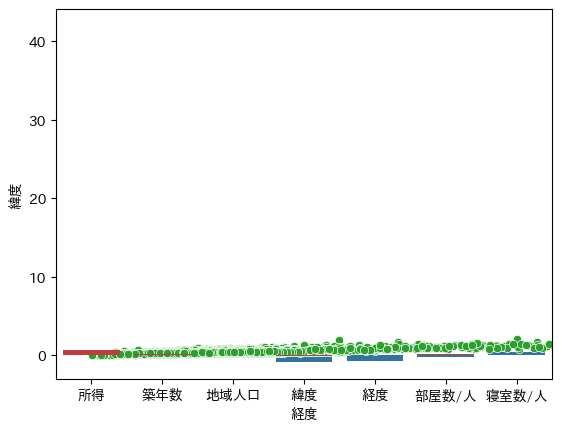

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import japanize_matplotlib

#california_housing_cleansing.csvを読み込んで不要なカラム「Unnamed: 0」を削除
df = pd.read_csv('sample_data/california_housing_cleansing.csv')
df = df.drop(columns = ['Unnamed: 0'])
df.head()

#説明変数と目的変数をそれぞれ、学習データとテストデータに分割
# 説明変数の定義
X = df.drop(columns=['住宅価格']).to_numpy()
# 目的変数の定義
y = df['住宅価格'].to_numpy()

# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#preprocessingモジュールの StandardScalerクラスをインポート
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#説明変数の学習データX_trainを用いて、標準化の変換モデルを生成
scaler.fit(X_train)
#生成した標準化の変換モデルを利用して、説明変数のスケールを
X_train_scaled = scaler.transform(X_train)
#X_trainと、X_train_scaledをDataFrame形式で表示させて、変換前後の状態を比較
df_X_train = pd.DataFrame(X_train, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_train.head()
#変換後の状態を表示
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_train_scaled.head()
#df_X_train_scaledの各要素の平均値と標準偏差を確認し、問題なく標準化されているかチェック
df_X_train_scaled.describe()
#生成した標準化の変換モデルを利用して、説明変数のテストデータX_testを変換
X_test_scaled  = scaler.transform(X_test)
#X_testと、X_test_scaledをDataFrame形式で表示させて、変換前後の状態を比較
df_X_test = pd.DataFrame(X_test, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_test.head()
#変換後の状態を表示
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_test_scaled.head()
#各要素の平均値と標準偏差を確認
df_X_test_scaled.describe()

#予測モデルの学習
#LinearRegressionクラスをインスタンス化して、modelという変数に代入
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#説明変数のスケール変換済み学習データ（X_train_scaled）と、目的変数の学習データ（y_train）を利用して学習させる(fit)
model.fit(X_train_scaled, y_train)
#予測モデルの評価
#予測モデルを評価します。scoreメソッドを利用して、決定係数を出力
model.score(X_train_scaled, y_train)
#テストデータで決定係数を確認
model.score(X_test_scaled, y_test)
#予測
#予測を行いましょう。前章と同様に、以下のデータをndarray形式でX_newという変数に保持
X_new = np.array([[8, 41, 500, 37, -120, 1, 0.2],
                  [2, 10, 2000, 38, -122, 1.5, 0.5],
                  [1, 25, 1000, 38, -121, 2, 1]])
#X_newをスケール変換
X_new_scaled = scaler.transform(X_new)
X_new_scaled
#X_new_scaledから住宅価格を予測
model.predict(X_new_scaled)
#設定したゴールに対する考察
#学習済み予測モデルをもとに、住宅価格を予測する計算式を作成しましょう。model.coef_で各要素の重みを、model.intercept_で切片を確認
print(model.coef_)
print(model.intercept_)
#各要素の重みをseabornのbarplot関数で可視化
sns.barplot(x = ['所得', '築年数', '地域人口', '緯度', '経度', '部屋数/人', '寝室数/人'], y=model.coef_)

#説明変数同士の相関係数を確認します。相関係数はDataFrameのcorrメソッドで算出可能です。dfから目的変数である住宅価格のデータを除き、corrメソッドを実行
df.drop(columns=['住宅価格']).corr()
#経度と緯度のペアから対処方法を検討します。相関の状態を確認するために、seabornのscatterplot関数で散布図を作成
sns.scatterplot(x='経度', y='緯度', data=df)
#部屋数/人と寝室数/人のペアの対処方法を検討します。散布図で相関の状態を確認
sns.scatterplot(x='部屋数/人', y='寝室数/人', data=df)
#説明変数は所得・築年数・地域人口・緯度・部屋数/人のみとします。目的変数は従来どおり、住宅価格です。説明変数Xと目的変数yを再定義
X = df[['所得', '築年数', '地域人口', '緯度', '部屋数/人']].to_numpy()
y = df['住宅価格'].to_numpy()
#説明変数のスケール変換
#説明変数のスケール変換を実施します。まずは多重共線性の対処後データを、学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#スケール変換モデルを生成するために、StandardScalerクラスをインスタンス化
scaler = StandardScaler()
#X_trainを利用して、標準化の変換ロジックをインプット
scaler.fit(X_train)
#この変換モデルを利用して、X_trainとX_testをスケール変換
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
#予測モデルの学習
#次に、LinearRegressionクラスを新たにインスタンス化
model = LinearRegression()
#次に、説明変数のスケール変換済み学習データ（X_train_scaled）と、目的変数の学習データ（y_train）で学習(fit)
model.fit(X_train_scaled, y_train)
#予測モデルの評価
#次に、予測モデルの評価を行います。scoreメソッドを利用して、決定係数を出力しましょう。学習データを用いた決定係数と、テストデータを用いた決定係数を、それぞれ算出
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))
#予測
#それでは、以下の住宅データから住宅価格を予測
X_new = np.array([[8, 41, 500, 38, 2],
                  [10, 10, 1000, 40, 1],
                  [7.5, 25, 3500, 39, 3]])
#X_newをスケール変換
X_new_scaled = scaler.transform(X_new)
#X_new_scaledから住宅価格を予測
model.predict(X_new_scaled)

#設定したゴールに対する考察
#学習済み予測モデルをもとに、住宅価格を予測する計算式を作成しましょう。model.coef_で各要素の重みを、model.intercept_で切片を確認
print(model.coef_)
print(model.intercept_)
#各要素の重みをseabornのbarplot関数で可視化
sns.barplot(x = ['所得', '築年数', '地域人口', '緯度', '部屋数/人'], y=model.coef_)

In [2]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 41.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=0d7c3065112485869d2c1408f4d1a00525d6d1aac17438f69e8fdb064866551b
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib
